# Histogram transformations

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
def compute_hist(img):
    """
    Computes the histogram of an image, i.e. counts the number of           occurences of each values
    ----------
    Input
    img : numpy array
    ----------
    Output
    out : numpy array
    ----------
    """
    out = np.zeros(256) # Specified length
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            out[int(img[i][j])] += 1
    return out

## I. Algorithm

**1.** Write the histogram stretching algorithm.

*Formulas :*

* Stretch : $\frac{I_{i, j}-I_{min}}{I_{max}-I_{min}} \times 255$

In [3]:
def stretch(img):
    return 255*((img-img.min())/(img.max()-img.min()))

**2.** Write the histogram uniformization algorithm.

*Formulas :*

* Uniformization : $f(x) = \frac{255}{N_{pixels}} \times \sum^{x}_{n=0} H(n)$

In [4]:
def uniformization(img):
    hist = compute_hist(img)
    out = np.zeros(img.shape)
    N = out.shape[0] * out.shape[1] # Number of pixels
    for i in range(out.shape[0]):
        for j in range(out.shape[1]):
            out[i][j] = (255/N)*sum(hist[:int(img[i][j])])
    return out

## Computation

**1.** Compute a stretching technique on the test image 'histo_imageTest_entree.png' : what do you observe ?

**2.** Compute an uniformization technique on the stretched image 'histo_imageTest_entree.png' : what do you observe ?

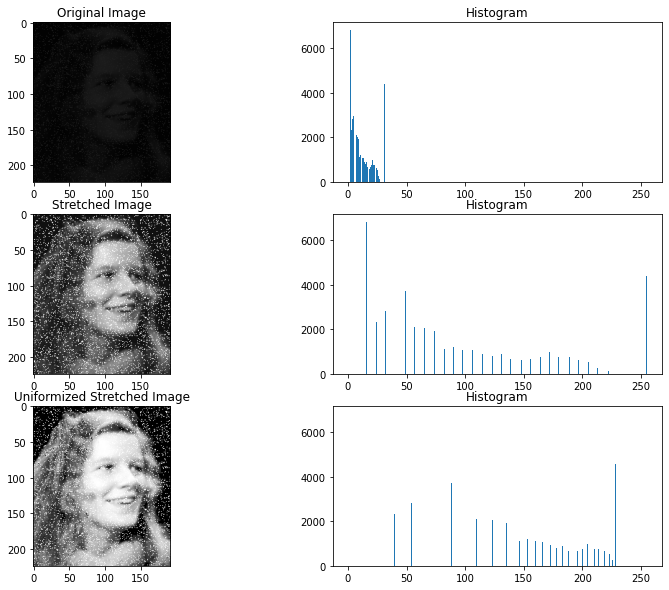

In [8]:
# Load image
img = cv2.imread("./data/histo_imageTest_entree.png")
new_img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
# Histogram
hist = compute_hist(new_img)
# Stretching
stretched_img = stretch(new_img)
stretched_hist = compute_hist(stretched_img)
# Uniformization
uniformized_img = uniformization(stretched_img)
uniformized_hist = compute_hist(uniformized_img)
# Display
fig, axs = plt.subplots(3,2, figsize=(13,10))
axs[0][0].set_title("Original Image")
axs[0][0].imshow(img)
axs[0][1].set_title("Histogram")
axs[0][1].bar(np.array([i for i in range(256)]), hist)
axs[1][0].set_title("Stretched Image")
axs[1][0].imshow(stretched_img,cmap=plt.cm.gray)
axs[1][1].set_title("Histogram")
axs[1][1].bar(np.array([i for i in range(256)]), stretched_hist)
axs[2][0].set_title("Uniformized Stretched Image")
axs[2][0].imshow(uniformized_img,cmap=plt.cm.gray)
axs[2][1].set_title("Histogram")
axs[2][1].bar(np.array([i for i in range(256)]), uniformized_hist)

plt.show()